## NN Adv Assignment

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

In [5]:
!pip install pandas


     ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
     -- ------------------------------------- 0.8/10.9 MB 15.9 MB/s eta 0:00:01
     ------ --------------------------------- 1.7/10.9 MB 15.2 MB/s eta 0:00:01
     -------- ------------------------------- 2.4/10.9 MB 15.2 MB/s eta 0:00:01
     ------------- -------------------------- 3.8/10.9 MB 18.7 MB/s eta 0:00:01
     ---------------- ----------------------- 4.6/10.9 MB 18.4 MB/s eta 0:00:01
     --------------------- ------------------ 5.8/10.9 MB 19.5 MB/s eta 0:00:01
     ------------------------- -------------- 7.0/10.9 MB 20.5 MB/s eta 0:00:01
     ------------------------------ --------- 8.3/10.9 MB 21.1 MB/s eta 0:00:01
     ---------------------------------- ----- 9.4/10.9 MB 22.2 MB/s eta 0:00:01
     ------------------------------------- - 10.5/10.9 MB 21.8 MB/s eta 0:00:01
     --------------------------------------- 10.9/10.9 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 0.

### Load Data

In [8]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [9]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [10]:
train['label'].nunique()

10

In [11]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [31]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X = X.reshape(-1, 28, 28, 1)

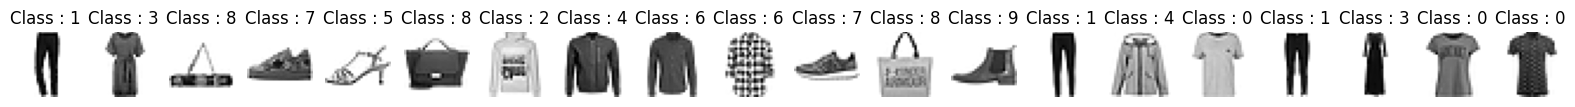

In [13]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [14]:
X_test = test.values

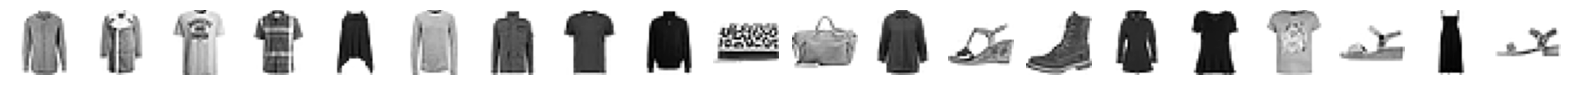

In [15]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [22]:
!pip install -U scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     --- ------------------------------------ 0.6/8.4 MB 13.8 MB/s eta 0:00:01
     ------ --------------------------------- 1.4/8.4 MB 15.2 MB/s eta 0:00:01
     ------------- -------------------------- 2.8/8.4 MB 19.7 MB/s eta 0:00:01
     ----------------- ---------------------- 3.8/8.4 MB 20.0 MB/s eta 0:00:01
     --------------------- ------------------ 4.6/8.4 MB 19.4 MB/s eta 0:00:01
     --------------------------- ------------ 5.7/8.4 MB 20.3 MB/s eta 0:00:01
     -------------------------------- ------- 6.8/8.4 MB 20.6 MB/s eta 0:00:01
     -------------------------------------- - 8.0/8.4 MB 21.4 MB/s eta 0:00:01
     ---------------------------------------  8.4/8.4 MB 20.6 MB/s eta 0:00:01
     ---------------------------------------- 8.4/8.4 MB 18.4 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ---------------------------------------- 0.0/42.5 MB ? eta -:--:--
     - ------

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


# 기본 신경망

In [33]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2757 - accuracy: 0.9030
Epoch 2/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2685 - accuracy: 0.9041
Epoch 3/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2613 - accuracy: 0.9069
Epoch 4/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2573 - accuracy: 0.9103
Epoch 5/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2539 - accuracy: 0.9110
Epoch 6/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2469 - accuracy: 0.9135
Epoch 7/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.2417 - accuracy: 0.9172
Epoch 8/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2377 - accuracy: 0.9169
Epoch 9/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.2333 - accuracy: 0.9176
Epoch 10/10
1488/1488 [==============================] - 4s 3ms/step - loss: 0.228

In [38]:
model.evaluate(X_val,y_val)

372/372 [==============================] - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8918


[0.3769378066062927, 0.8918487429618835]

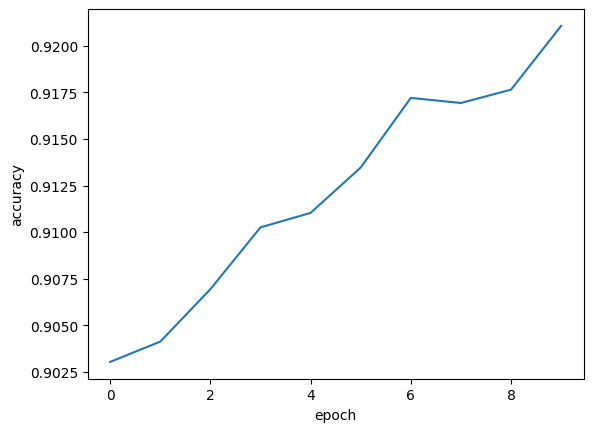

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# optimization추가, 층 추가

In [40]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.5075 - accuracy: 0.8166
Epoch 2/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3821 - accuracy: 0.8587
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3454 - accuracy: 0.8712
Epoch 4/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3204 - accuracy: 0.8812
Epoch 5/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3002 - accuracy: 0.8870
Epoch 6/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2829 - accuracy: 0.8937
Epoch 7/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2720 - accuracy: 0.8985
Epoch 8/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.2556 - accuracy: 0.9036
Epoch 9/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.2491 - accuracy: 0.9057
Epoch 10/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.238

- 성능 더 안좋음..아마 층추가 때문이라고 예상 층은 한개만 넣자 

# batch Normalization,kernel_initializer

In [42]:
initializer=keras.initializers.HeUniform(seed=21)
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,910
Trainable params: 79,710
Non-trainable params: 200
________________________________________________

In [46]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),callbacks=[early_stopping_cb])

Epoch 1/20
1488/1488 [==============================] - 6s 4ms/step - loss: 0.2326 - accuracy: 0.9144 - val_loss: 0.3961 - val_accuracy: 0.8651
Epoch 2/20
1488/1488 [==============================] - 5s 4ms/step - loss: 0.2222 - accuracy: 0.9180 - val_loss: 0.3916 - val_accuracy: 0.8691
Epoch 3/20
1488/1488 [==============================] - 5s 3ms/step - loss: 0.2161 - accuracy: 0.9213 - val_loss: 0.3255 - val_accuracy: 0.8896
Epoch 4/20
1488/1488 [==============================] - 5s 3ms/step - loss: 0.2106 - accuracy: 0.9221 - val_loss: 0.3436 - val_accuracy: 0.8829
Epoch 5/20
1488/1488 [==============================] - 5s 3ms/step - loss: 0.2047 - accuracy: 0.9234 - val_loss: 0.4344 - val_accuracy: 0.8602


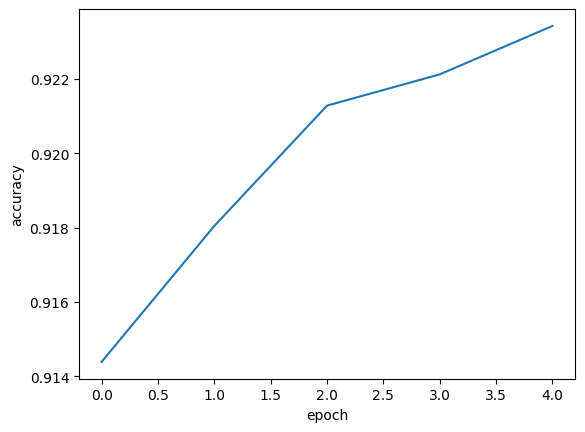

In [47]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# dropout

In [55]:
initializer=keras.initializers.HeUniform(seed=21)
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(216,kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0,2))
model.add(keras.layers.Dense(100,kernel_initializer=initializer))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0,2))
model.add(keras.layers.Dense(10,activation='softmax',kernel_initializer=initializer))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 216)               169560    
                                                                 
 batch_normalization_7 (Batc  (None, 216)              864       
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 216)               0         
                                                                 
 dropout_6 (Dropout)         (None, 216)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               21700     
                                                      

In [56]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')

history=model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val))

Epoch 1/20
1488/1488 [==============================] - 8s 5ms/step - loss: 0.4841 - accuracy: 0.8263 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 2/20
1488/1488 [==============================] - 7s 5ms/step - loss: 0.3700 - accuracy: 0.8637 - val_loss: 0.3548 - val_accuracy: 0.8678
Epoch 3/20
1488/1488 [==============================] - 7s 4ms/step - loss: 0.3299 - accuracy: 0.8771 - val_loss: 0.3399 - val_accuracy: 0.8775
Epoch 4/20
1488/1488 [==============================] - 7s 5ms/step - loss: 0.3026 - accuracy: 0.8872 - val_loss: 0.3396 - val_accuracy: 0.8750
Epoch 5/20
1488/1488 [==============================] - 7s 5ms/step - loss: 0.2823 - accuracy: 0.8944 - val_loss: 0.3401 - val_accuracy: 0.8794
Epoch 6/20
1488/1488 [==============================] - 7s 4ms/step - loss: 0.2637 - accuracy: 0.9015 - val_loss: 0.2872 - val_accuracy: 0.8952
Epoch 7/20
1488/1488 [==============================] - 7s 5ms/step - loss: 0.2458 - accuracy: 0.9082 - val_loss: 0.3112 - val_accuracy:

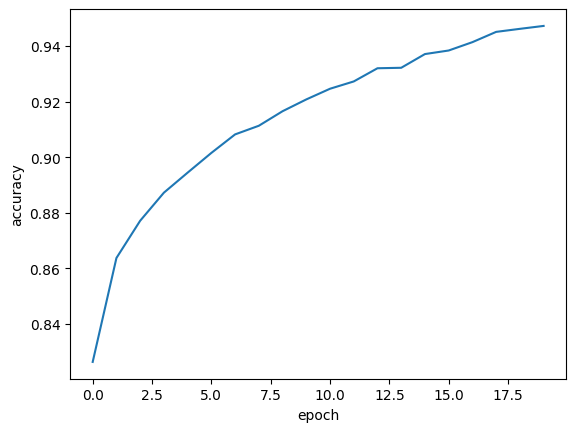

In [57]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()